In [15]:
import pandas as pd
import requests
from pandas import json_normalize
import matplotlib.pyplot as plt

In [16]:
url = 'https://meri.digitraffic.fi/api/port-call/v1/ports'
response = requests.get(url)
data = response.json()

In [17]:
coordinates_list = []

for row in data["ssnLocations"]["features"]:
    geometry = row.get("geometry")
    if geometry is not None:
        coordinates = geometry.get("coordinates")
        if coordinates is not None:
            coordinates_list.append(coordinates)
    
df = pd.DataFrame(coordinates_list, columns=["x", "y"])
print(df)

              x         y
0       8.70000  49.41667
1       8.55000  54.56667
2       7.86667  54.16667
3       9.81667  47.65000
4       9.46667  51.96667
...         ...       ...
12264  28.16667  45.46667
12265  22.50000  41.65000
12266 -70.16667  11.66667
12267  15.61667  78.21667
12268  21.91667  41.85000

[12269 rows x 2 columns]


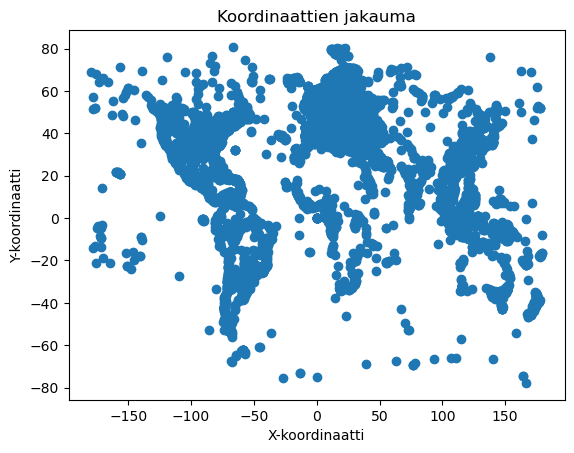

In [18]:
plt.scatter(df["x"], df["y"])
plt.xlabel("X-koordinaatti")
plt.ylabel("Y-koordinaatti")
plt.title("Koordinaattien jakauma")
plt.show()

In [28]:
coordinates_list = []

for row in data["ssnLocations"]["features"]:
    properties = row.get("properties")
    if properties is not None and properties.get("country") == "Finland":
        geometry = row.get("geometry")
        if geometry is not None:
            coordinates = geometry.get("coordinates")
            if coordinates is not None:
                x, y = coordinates
                if 15 <= x <= 35 and 50 <= y <= 70:
                    coordinates_list.append(coordinates)


df = pd.DataFrame(coordinates_list, columns=["x", "y"])
print(df)

            x         y
0    24.40000  60.08333
1    23.03462  63.85183
2    21.56667  60.16667
3    23.71054  64.22125
4    20.88333  59.93333
..        ...       ...
178  29.16667  63.53333
179  25.58333  60.33333
180  25.46667  65.01667
181  23.55000  60.11667
182  21.48878  61.59342

[183 rows x 2 columns]


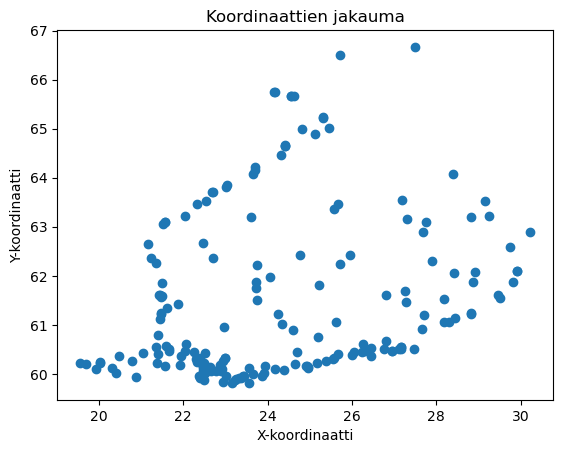

In [29]:
plt.scatter(df["x"], df["y"])
plt.xlabel("X-koordinaatti")
plt.ylabel("Y-koordinaatti")
plt.title("Koordinaattien jakauma")
plt.show()

In [46]:
url = 'https://tie.digitraffic.fi//api/tms/v1/stations'
response = requests.get(url)
data = response.json()

In [47]:
x_values = []
y_values = []
collection_status = []

for feature in data["features"]:
    geometry = feature.get("geometry")
    properties = feature.get("properties")
    if geometry is not None and properties is not None:
        coordinates = geometry.get("coordinates")
        if coordinates is not None and len(coordinates) >= 2:
            x = coordinates[0]
            y = coordinates[1]
            x_values.append(x)
            y_values.append(y)
            collection_status.append(properties.get("collectionStatus"))

df = pd.DataFrame({"x": x_values, "y": y_values, "collectionStatus": collection_status})

print(df)


             x          y collectionStatus
0    24.637997  60.220898        GATHERING
1    24.680272  60.210344        GATHERING
2    24.710207  60.200669        GATHERING
3    24.695188  60.205637        GATHERING
4    24.749333  60.205067        GATHERING
..         ...        ...              ...
513  23.631862  60.378167        GATHERING
514  23.725723  60.376360        GATHERING
515  23.872018  60.366762        GATHERING
516  23.949030  60.325108        GATHERING
517  24.079464  60.289063        GATHERING

[518 rows x 3 columns]


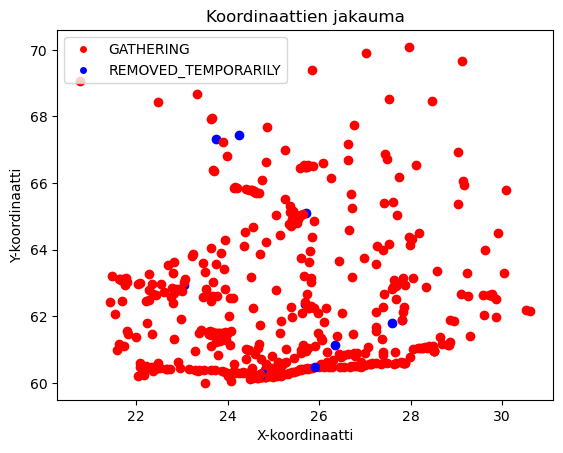

In [52]:
colors = {"GATHERING": "red", "REMOVED_TEMPORARILY": "blue"}

for _, row in df.iterrows():
    x = row["x"]
    y = row["y"]
    collection_status = row["collectionStatus"]
    color = colors.get(collection_status, "gray")
    plt.scatter(x, y, color=color)

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, label=status)
                   for status, color in colors.items()]
plt.legend(handles=legend_elements)    
    
plt.title("Koordinaattien jakauma")
plt.xlabel("X-koordinaatti")
plt.ylabel("Y-koordinaatti")
plt.show()

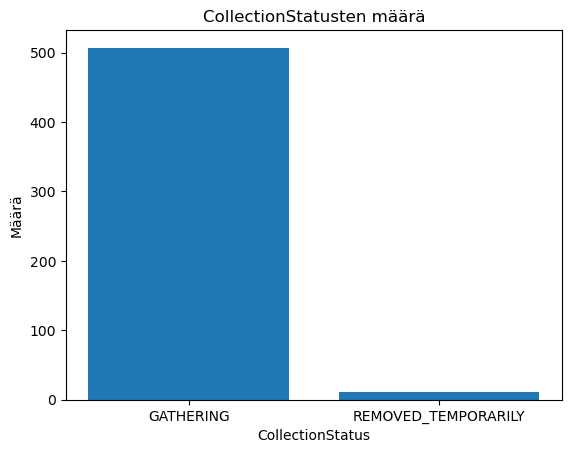

In [43]:
collection_status_counts = []

for feature in data["features"]:
    properties = feature.get("properties")
    if properties is not None:
        collection_status = properties.get("collectionStatus")
        if collection_status is not None:
            collection_status_counts.append(collection_status)

df = pd.DataFrame({"collectionStatus": collection_status_counts})

status_counts = df["collectionStatus"].value_counts()

plt.bar(status_counts.index, status_counts.values)

plt.title("CollectionStatusten määrä")
plt.xlabel("CollectionStatus")
plt.ylabel("Määrä")

plt.show()

In [53]:
x_values = []
y_values = []
data_updated_times = []

for feature in data["features"]:
    geometry = feature.get("geometry")
    properties = feature.get("properties")
    if geometry is not None and properties is not None:
        coordinates = geometry.get("coordinates")
        data_updated_time = properties.get("dataUpdatedTime")
        if coordinates is not None and len(coordinates) >= 2 and data_updated_time is not None:
            x = coordinates[0]
            y = coordinates[1]
            x_values.append(x)
            y_values.append(y)
            data_updated_times.append(data_updated_time)

df = pd.DataFrame({"x": x_values, "y": y_values, "dataUpdatedTime": data_updated_times})
print(df)

             x          y       dataUpdatedTime
0    24.637997  60.220898  2023-05-09T08:08:00Z
1    24.680272  60.210344  2023-05-09T08:08:00Z
2    24.710207  60.200669  2023-05-09T08:08:00Z
3    24.695188  60.205637  2023-05-09T08:08:00Z
4    24.749333  60.205067  2023-05-09T08:08:00Z
..         ...        ...                   ...
513  23.631862  60.378167  2023-05-30T15:13:28Z
514  23.725723  60.376360  2022-09-27T07:20:32Z
515  23.872018  60.366762  2023-05-30T15:09:25Z
516  23.949030  60.325108  2023-05-30T15:10:25Z
517  24.079464  60.289063  2023-05-30T15:13:26Z

[518 rows x 3 columns]


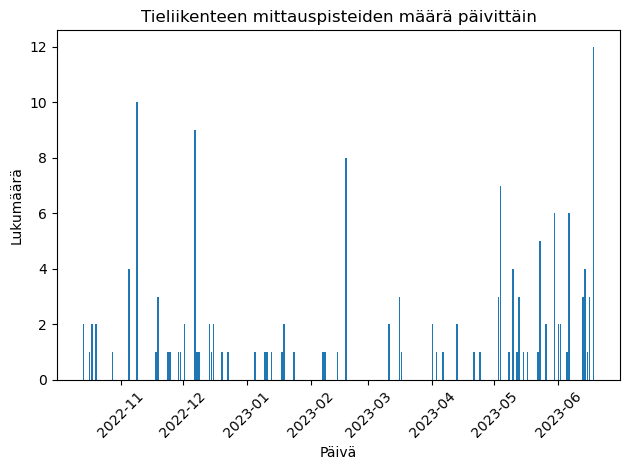

In [72]:
df["dataUpdatedTime"] = pd.to_datetime(df["dataUpdatedTime"])

daily_counts = df.groupby(df["dataUpdatedTime"].dt.date).size()

plt.bar(daily_counts.index, daily_counts.values)

plt.title("Tieliikenteen mittauspisteiden määrä päivittäin")
plt.xlabel("Päivä")
plt.ylabel("Lukumäärä")

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

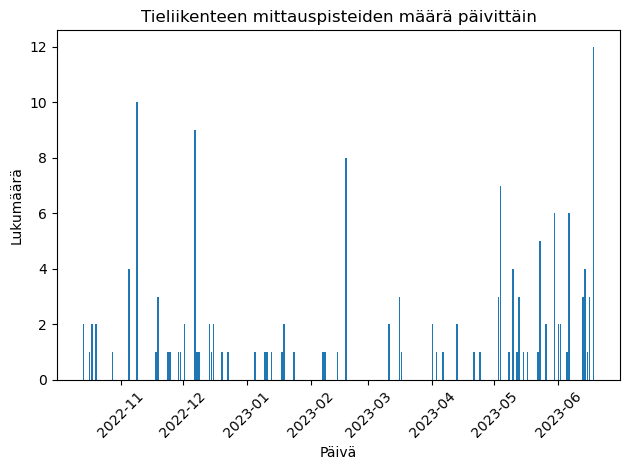

In [73]:
df = df[df["dataUpdatedTime"].dt.date >= pd.to_datetime("2022-10-01").date()]
daily_counts = df.groupby(df["dataUpdatedTime"].dt.date).size()
plt.bar(daily_counts.index, daily_counts.values)

plt.title("Tieliikenteen mittauspisteiden määrä päivittäin")
plt.xlabel("Päivä")
plt.ylabel("Lukumäärä")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()